# MODEL III : Decision Trees and Random forests

## Data

In [2]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, evaluate.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *
from src.model_evaluation import *

# Import the data
from data.data_extract import load_data

In [2]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Preprocessing

### Basic preprocessing

In [3]:
data = df_data.copy()
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.shape

(48842, 15)

In [6]:
# Basic preprocessing : Fix target + remove inutil columns + drop outliers
data = preprocess(data)
data.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [7]:
data.shape

(48592, 13)

### Separating dataset - train and test

In [8]:
# Seperate the data into train and test
df_train, df_test = seperate_train_test(data, random_state=42)

In [9]:
df_train.shape, df_test.shape

((38873, 13), (9719, 13))

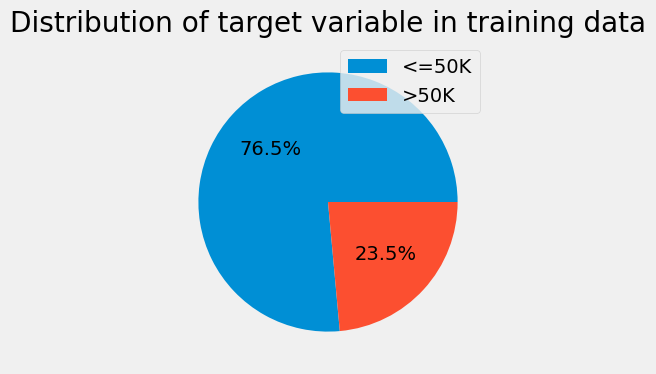

In [10]:
# Check the distribution of target variable in training data
plt.figure(figsize=(8, 4))
plt.pie(df_train['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in training data')
plt.show()

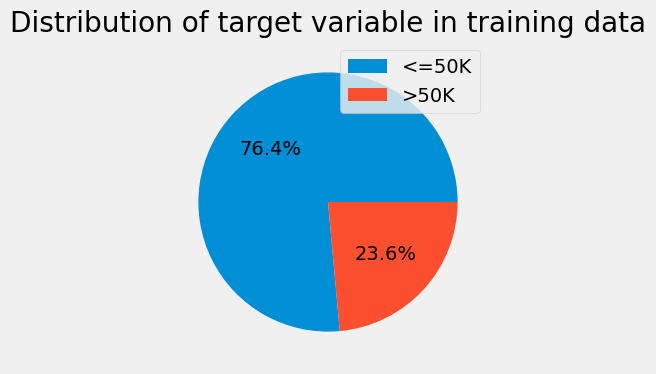

In [11]:
# Check the distribution of target variable in test data
plt.figure(figsize=(8, 4))
plt.pie(df_test['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in training data')
plt.show()

### Impute the missing values

In [12]:
# Seperate the categorical and numerical variables
cat_features = get_cat_features(data)
cont_features = get_cont_features(data)

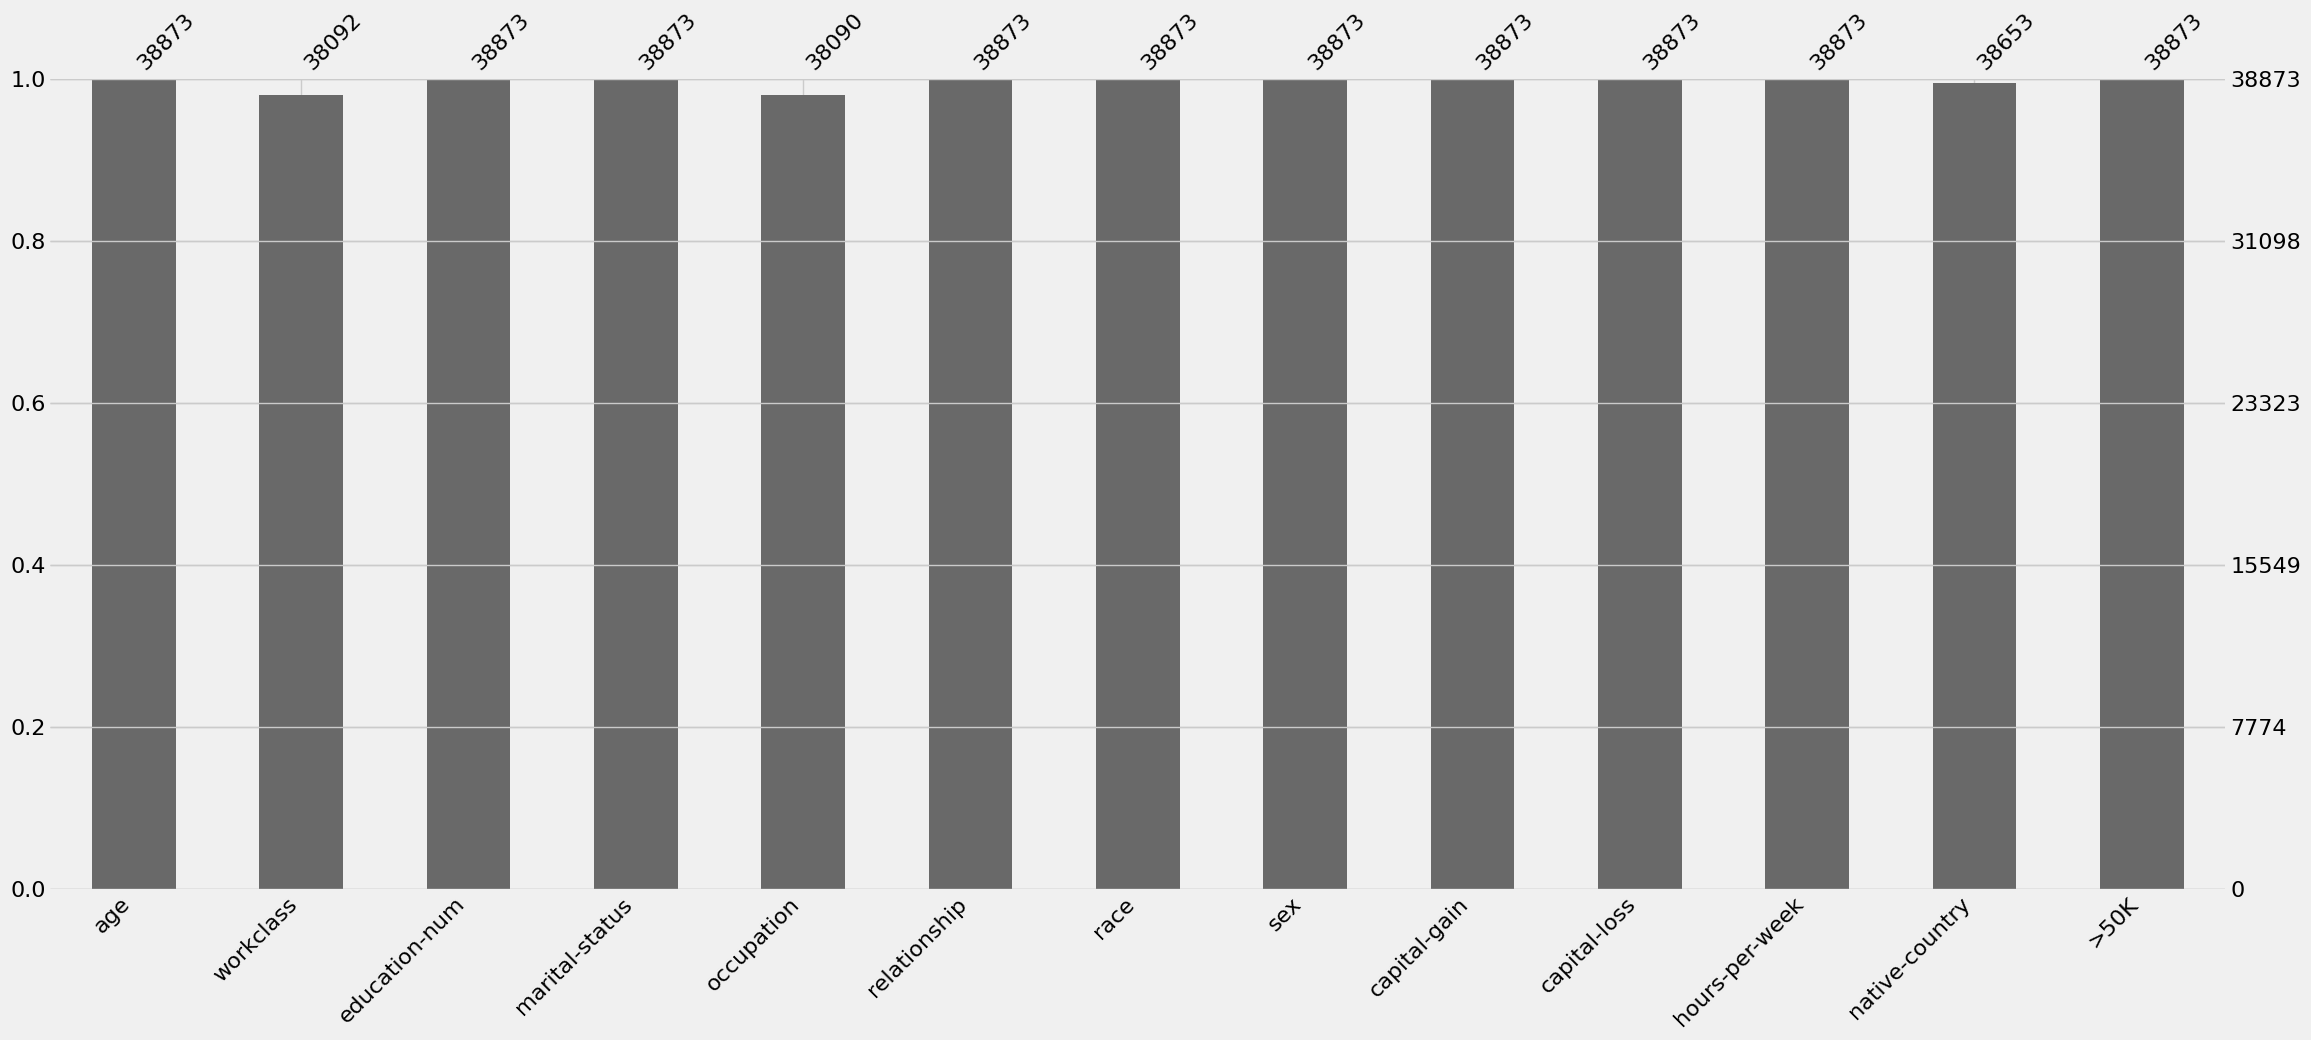

In [13]:
ax = msno.bar(df_train)

In [14]:
# Impute the missing values in the categorical variables
imput_cont = SimpleImputer(missing_values=np.nan, strategy='mean')
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# on n'impute pas pour les variables numériques car aucune n'est manquante. 
# for feature in cont_features :
#     df_train[feature] = imput_cont.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
#     df_test[feature] = imput_cont.transform(df_test[feature].values.reshape(-1,1)).ravel()
    
for feature in cat_features :
    df_train[feature] = imput_cat.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
    df_test[feature] = imput_cat.transform(df_test[feature].values.reshape(-1,1)).ravel()

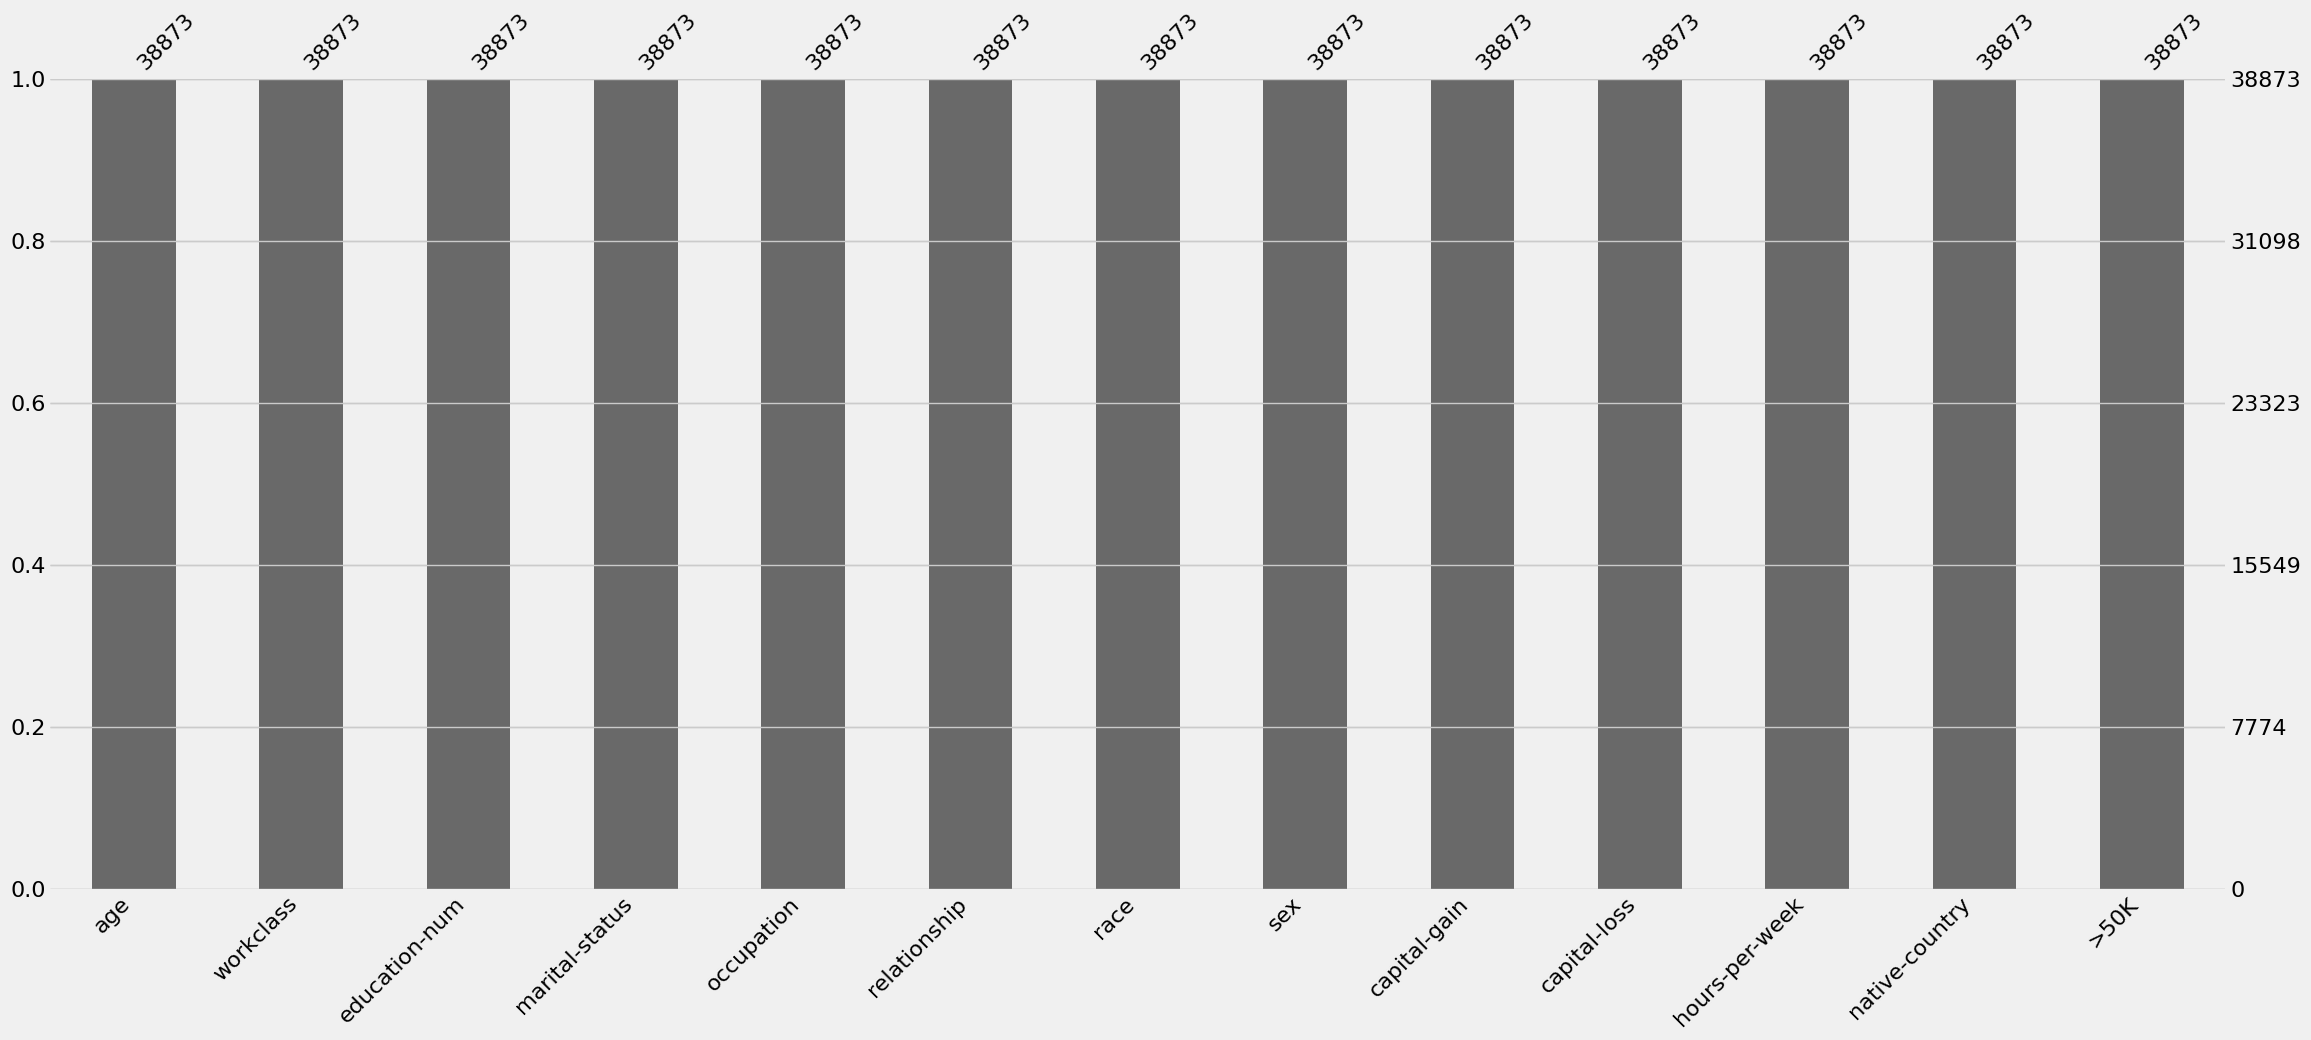

In [15]:
ax = msno.bar(df_train)

## Regrouping features

### Values not referenced

In [16]:
df_train['workclass'] = df_train['workclass'].replace({'?': 'Not referenced'})
df_test['workclass'] = df_test['workclass'].replace({'?': 'Not referenced'})

df_train['native-country'] = df_train['native-country'].replace({'?': 'Not referenced'})
df_test['native-country'] = df_test['native-country'].replace({'?': 'Not referenced'})

df_train['occupation'] = df_train['occupation'].replace({'?': 'Not referenced'})
df_test['occupation'] = df_test['occupation'].replace({'?': 'Not referenced'})

### Workclass

In [17]:
# Regroup 'Without-pay' and 'Never-worked' to 'No revenu'
df_train['workclass'] = df_train['workclass'].replace({'Without-pay': 'No revenu', 'Never-worked': 'No revenu'})
df_test['workclass'] = df_test['workclass'].replace({'Without-pay': 'No revenu', 'Never-worked': 'No revenu'})

# Regrouper 'Self-emp-not-inc' and 'Self-emp-inc' to 'Self-emp'
df_train['workclass'] = df_train['workclass'].replace({'Self-emp-not-inc': 'Self-emp', 'Self-emp-inc': 'Self-emp'})
df_test['workclass'] = df_test['workclass'].replace({'Self-emp-not-inc': 'Self-emp', 'Self-emp-inc': 'Self-emp'})

In [18]:
df_train[df_train['workclass'] == 'Self-emp'].head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
9101,39,Self-emp,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,1
14514,17,Self-emp,6,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0
40994,45,Self-emp,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
6042,43,Self-emp,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,68,United-States,1
37641,44,Self-emp,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States,1
30787,29,Self-emp,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,1
3048,53,Self-emp,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,0
39330,38,Self-emp,9,Divorced,Exec-managerial,Unmarried,White,Male,0,0,40,United-States,0
32394,31,Self-emp,9,Divorced,Other-service,Not-in-family,White,Male,0,0,35,United-States,0
24219,45,Self-emp,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


### Marital-status

In [19]:
df_train['marital-status'] = df_train['marital-status'].replace({'Divorced': 'Now Single', 'Separated': 'Now Single', 'Widowed': 'Now Single'})
df_test['marital-status'] = df_test['marital-status'].replace({'Divorced': 'Now Single', 'Separated': 'Now Single', 'Widowed': 'Now Single'})

df_train['marital-status'] = df_train['marital-status'].replace({'Married-civ-spouse': 'Married', 'Married-AF-spouse': 'Married'})
df_test['marital-status'] = df_test['marital-status'].replace({'Married-civ-spouse': 'Married', 'Married-AF-spouse': 'Married'})

### Relationship

In [20]:
df_train['relationship'] = df_train['relationship'].replace({'Husband': 'Married', 'Wife': 'Married'})
df_test['relationship'] = df_test['relationship'].replace({'Husband': 'Married', 'Wife': 'Married'})

### Race

In [21]:
df_train['race'] = df_train['race'].replace({'Amer-Indian-Eskimo': 'Other'})
df_test['race'] = df_test['race'].replace({'Amer-Indian-Eskimo': 'Other'})

### Native-country

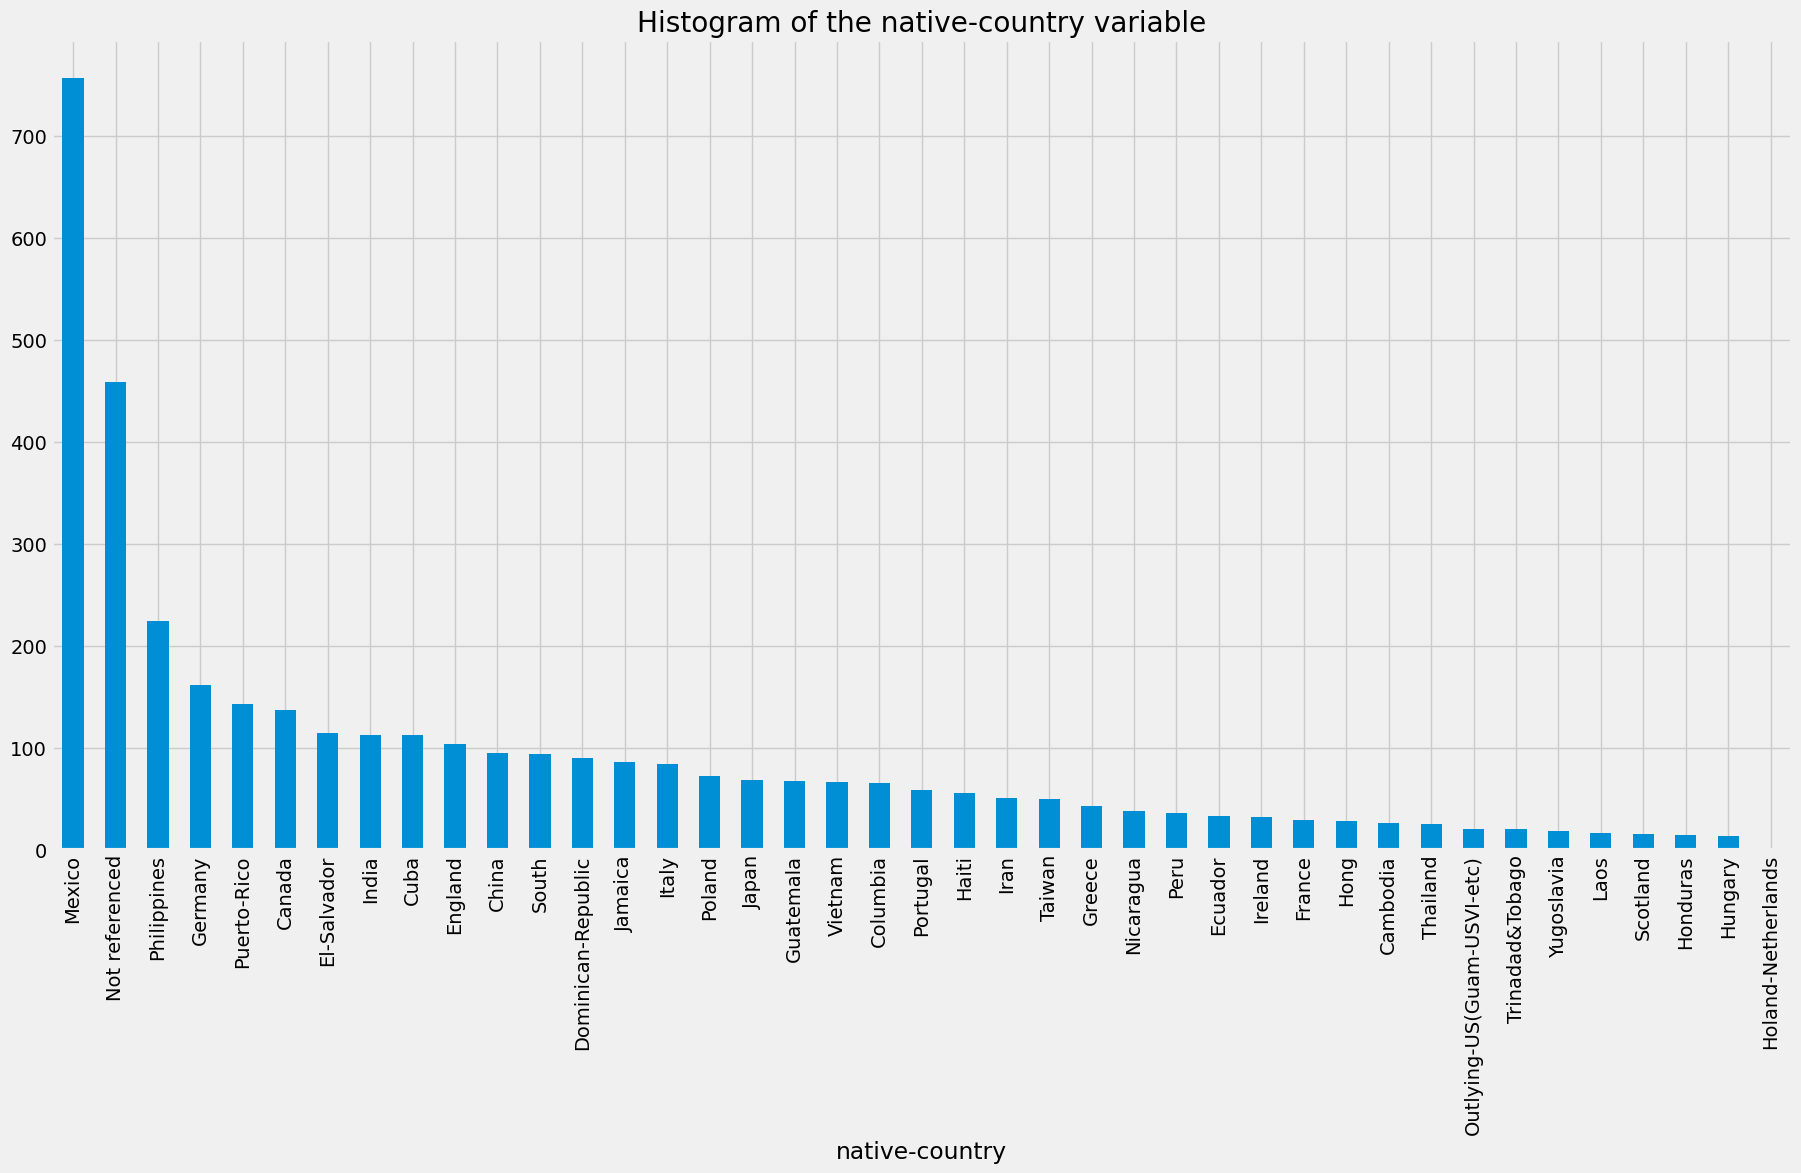

In [22]:
# For each value of the 'native-country' variable, we calculate the number of individuals who have this value
filtered = df_train[df_train['native-country'] != 'United-States']

plt.figure(figsize=(20, 10))
filtered['native-country'].value_counts().plot(kind='bar')
plt.title('Histogram of the native-country variable')
plt.show()


On met dans la catégorie "Other" tous les pays qui obtiennent un nombre d'observations inférieur à 200. 

In [23]:
# Counting for each value of the variable 'native-country' the number of individuals who have this value
filtered = df_train[df_train['native-country'] != 'United-States']

for country in filtered['native-country'].unique():
    nb_samples_associated = filtered[filtered['native-country'] == country].shape[0]
    if nb_samples_associated < 200:
        df_train['native-country'] = df_train['native-country'].replace({country: 'Other'})
        df_test['native-country'] = df_test['native-country'].replace({country: 'Other'})
        

### New features

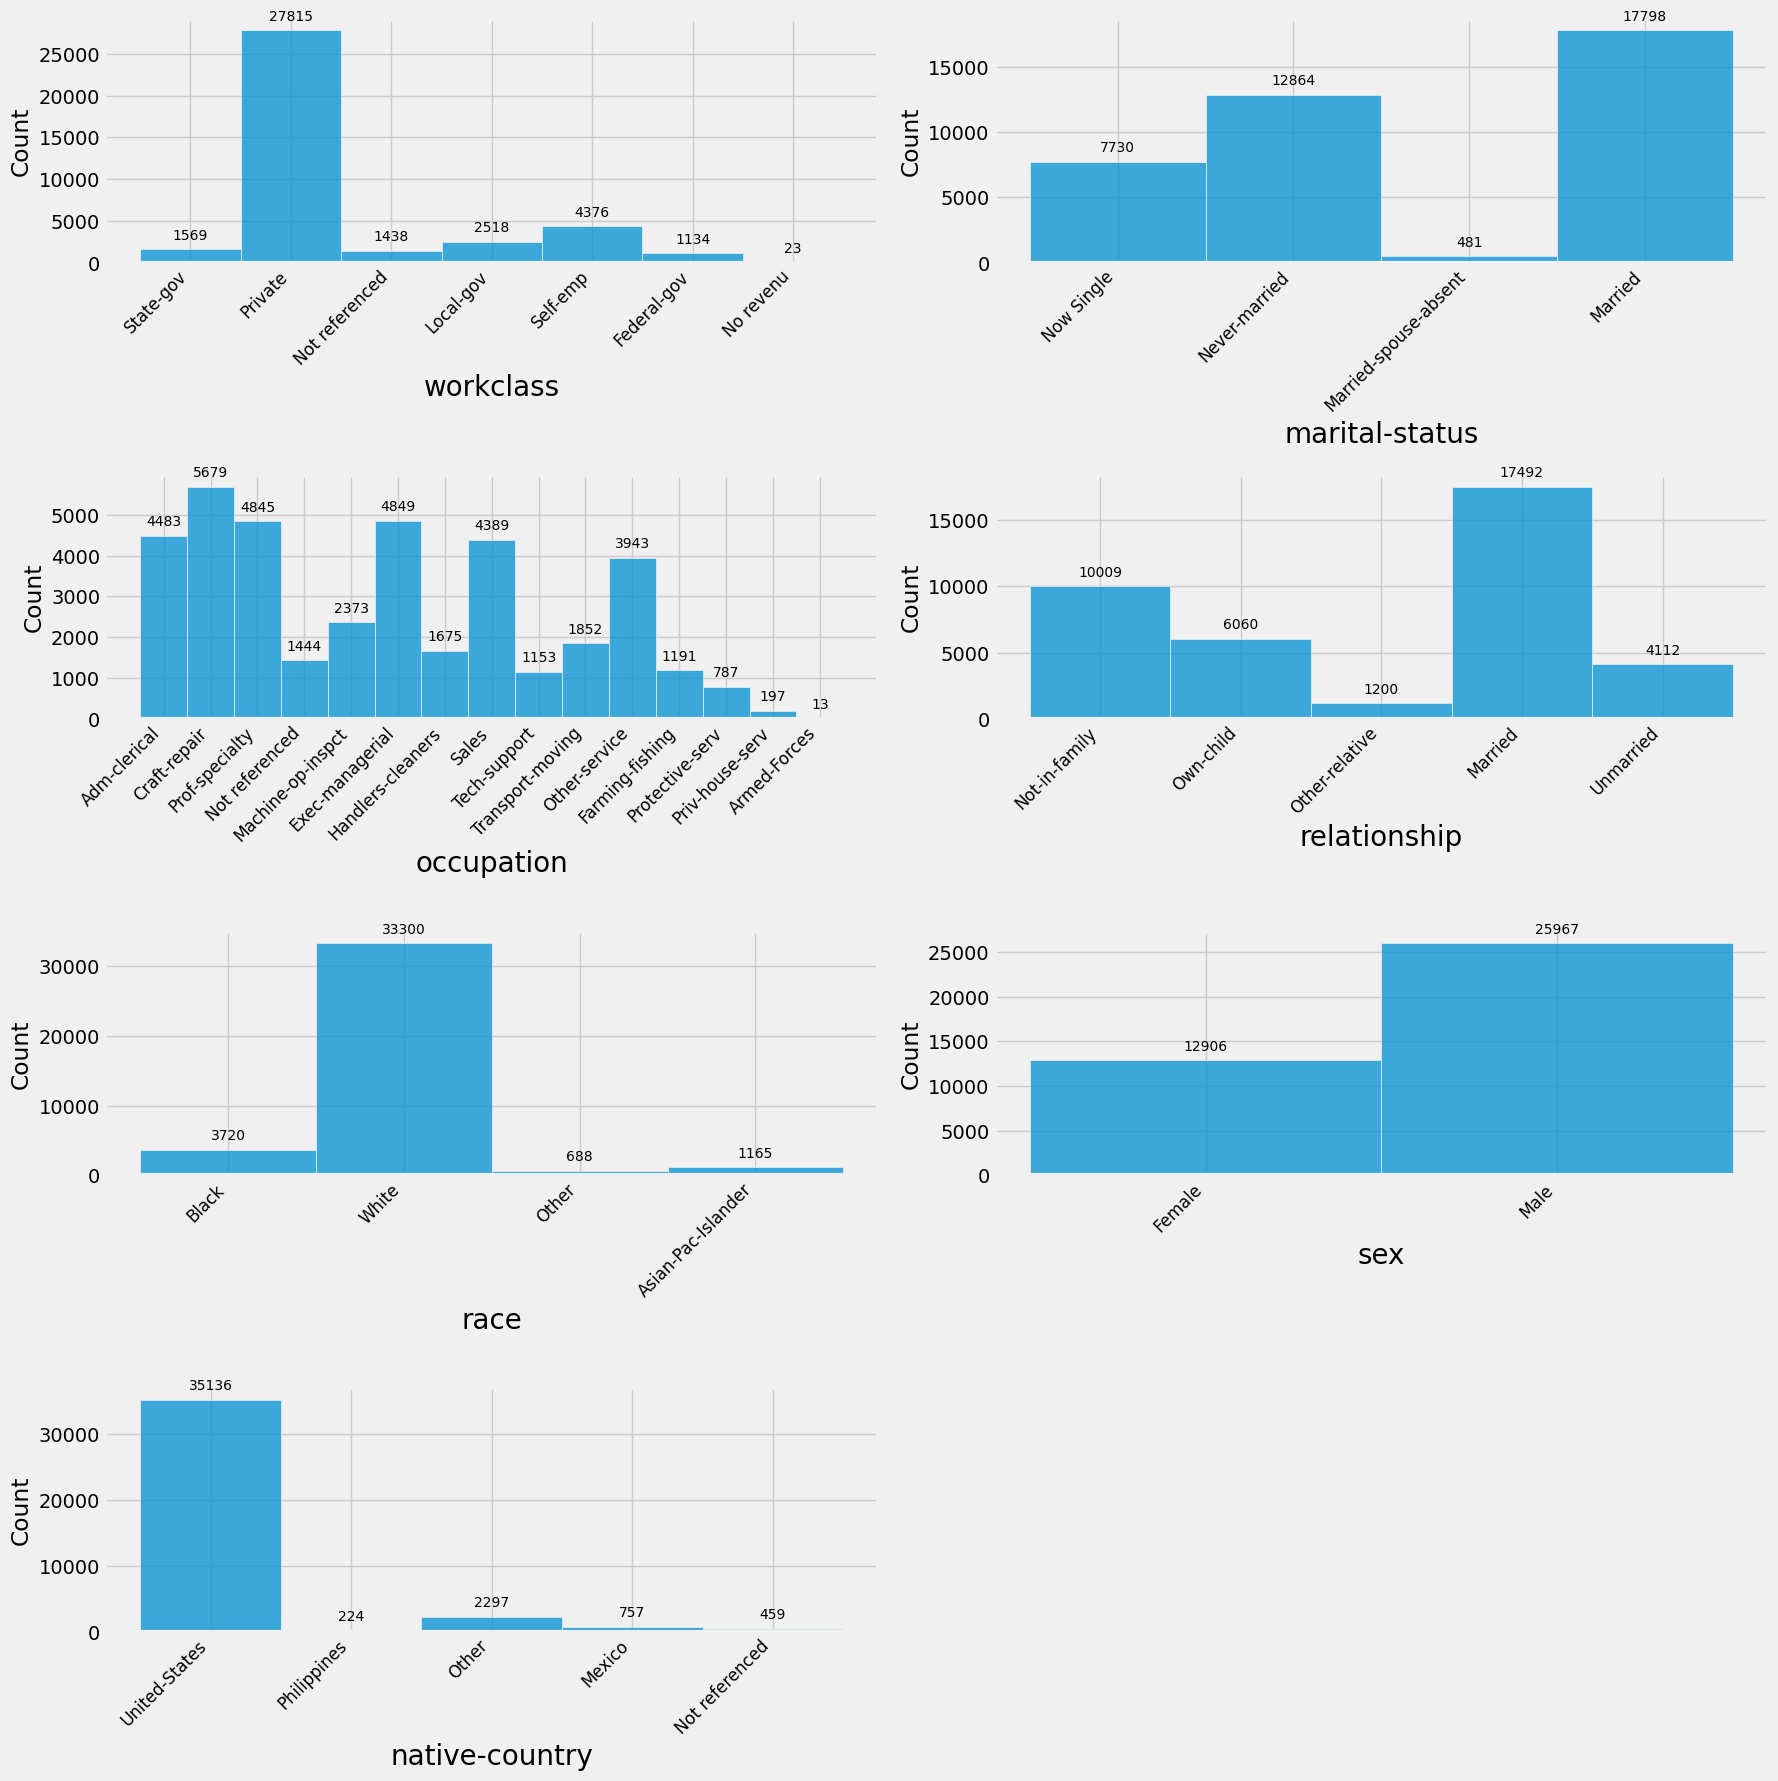

In [24]:
# Plot the distribution of the categorical variables
df_train_categ = df_train.select_dtypes(include='object')

plt.figure(figsize=(18, 18))
for i, feature in enumerate(df_train_categ.columns):
    if i <= 7:
        ax = plt.subplot(4, 2, i + 1)
        hist = sns.histplot(df_train[feature], ax=ax)
        
        if i == 7:  # Si c'est le dernier graphique, afficher uniquement la valeur la plus élevée car sinon illisible
            max_height = 0
            max_p = None
            for p in hist.patches:
                height = p.get_height()
                if height > max_height:
                    max_height = height
                    max_p = p
            if max_p is not None:
                ax.annotate(f'{max_height:.0f}',
                            xy=(max_p.get_x() + max_p.get_width() / 2, max_height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        else:  # Pour les autres graphiques, afficher toutes les valeurs
            for p in hist.patches:
                height = p.get_height()
                ax.annotate(f'{height:.0f}',
                            xy=(p.get_x() + p.get_width() / 2, height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        
        ax.set_xlabel(feature, fontsize=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

plt.tight_layout()
plt.show()

## Standardization

### Df_train, Df_test

In [25]:
df_train.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
19782,40,State-gov,10,Now Single,Adm-clerical,Not-in-family,Black,Female,0,0,35,United-States,0
21498,33,Private,8,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,0
13196,23,Private,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,0
806,50,Not referenced,14,Married-spouse-absent,Not referenced,Other-relative,White,Male,0,0,40,United-States,0
36728,38,Private,9,Married,Machine-op-inspct,Married,White,Male,0,0,40,United-States,0
31490,20,Private,12,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,0
7978,37,Private,9,Married,Handlers-cleaners,Married,White,Male,0,0,45,United-States,1
8782,21,Not referenced,12,Never-married,Not referenced,Own-child,White,Male,0,0,15,United-States,0
5801,27,Private,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
37044,22,Private,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0


In [26]:
df_test.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
28493,25,Private,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0
33059,34,Private,3,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Other,0
19754,32,Self-emp,11,Married,Exec-managerial,Married,White,Male,0,0,40,United-States,0
948,43,Private,10,Now Single,Craft-repair,Unmarried,White,Male,0,0,35,United-States,0
15958,24,Self-emp,10,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,45,United-States,0
10414,34,Private,9,Married,Craft-repair,Married,White,Male,3908,0,46,United-States,0
22413,55,Private,9,Married,Tech-support,Married,White,Male,0,0,20,United-States,0
8800,36,Local-gov,11,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,1
18238,28,Private,13,Married,Prof-specialty,Married,Asian-Pac-Islander,Male,0,0,40,Other,0
39503,48,Local-gov,13,Married,Prof-specialty,Married,White,Male,0,0,40,United-States,0


In [27]:
# Separate the features and target variable
X_train = df_train.drop('>50K', axis=1)
y_train = df_train['>50K']

X_test = df_test.drop('>50K', axis=1)
y_test = df_test['>50K']

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((38873, 12), (38873,), (9719, 12), (9719,))

### Separate Categorical and numerical variables

In [29]:
# Seperate the categorical and numerical variables
cat_features = df_train.select_dtypes('object').columns
cat_features.append(pd.Index(['education-num']))

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [30]:
cont_features = df_train.select_dtypes('int64').columns
cont_features = cont_features.drop('education-num')
cont_features = cont_features.drop('>50K')
cont_features

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

### Numerical variables

In [31]:
X_train.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19782,40,State-gov,10,Now Single,Adm-clerical,Not-in-family,Black,Female,0,0,35,United-States
21498,33,Private,8,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States
13196,23,Private,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States
806,50,Not referenced,14,Married-spouse-absent,Not referenced,Other-relative,White,Male,0,0,40,United-States
36728,38,Private,9,Married,Machine-op-inspct,Married,White,Male,0,0,40,United-States
31490,20,Private,12,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States
7978,37,Private,9,Married,Handlers-cleaners,Married,White,Male,0,0,45,United-States
8782,21,Not referenced,12,Never-married,Not referenced,Own-child,White,Male,0,0,15,United-States
5801,27,Private,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
37044,22,Private,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States


In [32]:
# Standard Scaler

scale_standard = StandardScaler() 

print('Categorical features : ', cont_features)
for feature in cont_features:

    # Normaliser les données d'entrainement
    X_train[feature] = scale_standard.fit_transform(X_train[feature].values.reshape(-1,1)) 
    X_train[feature] = X_train[feature].ravel()

    # Normaliser les données 
    X_test[feature] = scale_standard.transform(X_test[feature].values.reshape(-1,1))
    X_test[feature] = X_test[feature].ravel()


Categorical features :  Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')


In [33]:
X_train.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19782,0.102532,State-gov,10,Now Single,Adm-clerical,Not-in-family,Black,Female,-0.229411,-0.217777,-0.433042,United-States
21498,-0.407189,Private,8,Never-married,Craft-repair,Own-child,Black,Male,-0.229411,-0.217777,-0.030552,United-States
13196,-1.135362,Private,13,Never-married,Prof-specialty,Own-child,White,Female,-0.229411,-0.217777,-0.030552,United-States
806,0.830705,Not referenced,14,Married-spouse-absent,Not referenced,Other-relative,White,Male,-0.229411,-0.217777,-0.030552,United-States
36728,-0.043103,Private,9,Married,Machine-op-inspct,Married,White,Male,-0.229411,-0.217777,-0.030552,United-States
31490,-1.353814,Private,12,Never-married,Exec-managerial,Own-child,White,Female,-0.229411,-0.217777,-0.030552,United-States
7978,-0.115920,Private,9,Married,Handlers-cleaners,Married,White,Male,-0.229411,-0.217777,0.371937,United-States
8782,-1.280996,Not referenced,12,Never-married,Not referenced,Own-child,White,Male,-0.229411,-0.217777,-2.043001,United-States
5801,-0.844093,Private,9,Never-married,Craft-repair,Not-in-family,White,Male,-0.229411,-0.217777,-0.030552,United-States
37044,-1.208179,Private,9,Never-married,Craft-repair,Own-child,White,Male,-0.229411,-0.217777,-0.030552,United-States


### Categorical variables

In [34]:
X_train.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19782,0.102532,State-gov,10,Now Single,Adm-clerical,Not-in-family,Black,Female,-0.229411,-0.217777,-0.433042,United-States
21498,-0.407189,Private,8,Never-married,Craft-repair,Own-child,Black,Male,-0.229411,-0.217777,-0.030552,United-States
13196,-1.135362,Private,13,Never-married,Prof-specialty,Own-child,White,Female,-0.229411,-0.217777,-0.030552,United-States
806,0.830705,Not referenced,14,Married-spouse-absent,Not referenced,Other-relative,White,Male,-0.229411,-0.217777,-0.030552,United-States
36728,-0.043103,Private,9,Married,Machine-op-inspct,Married,White,Male,-0.229411,-0.217777,-0.030552,United-States
31490,-1.353814,Private,12,Never-married,Exec-managerial,Own-child,White,Female,-0.229411,-0.217777,-0.030552,United-States
7978,-0.115920,Private,9,Married,Handlers-cleaners,Married,White,Male,-0.229411,-0.217777,0.371937,United-States
8782,-1.280996,Not referenced,12,Never-married,Not referenced,Own-child,White,Male,-0.229411,-0.217777,-2.043001,United-States
5801,-0.844093,Private,9,Never-married,Craft-repair,Not-in-family,White,Male,-0.229411,-0.217777,-0.030552,United-States
37044,-1.208179,Private,9,Never-married,Craft-repair,Own-child,White,Male,-0.229411,-0.217777,-0.030552,United-States


In [35]:
# Label Encoding

label_encoder = LabelEncoder()

X_train_LEncoder = X_train.copy()
X_test_LEncoder = X_test.copy()

for feature in cat_features:
    X_train_LEncoder[feature] = label_encoder.fit_transform(X_train_LEncoder[feature])
    X_test_LEncoder[feature] = label_encoder.transform(X_test_LEncoder[feature])

In [36]:
X_train_LEncoder.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19782,0.102532,6,10,3,0,1,1,0,-0.229411,-0.217777,-0.433042,4
21498,-0.407189,4,8,2,2,3,1,1,-0.229411,-0.217777,-0.030552,4
13196,-1.135362,4,13,2,10,3,3,0,-0.229411,-0.217777,-0.030552,4
806,0.830705,3,14,1,7,2,3,1,-0.229411,-0.217777,-0.030552,4
36728,-0.043103,4,9,0,6,0,3,1,-0.229411,-0.217777,-0.030552,4
31490,-1.353814,4,12,2,3,3,3,0,-0.229411,-0.217777,-0.030552,4
7978,-0.115920,4,9,0,5,0,3,1,-0.229411,-0.217777,0.371937,4
8782,-1.280996,3,12,2,7,3,3,1,-0.229411,-0.217777,-2.043001,4
5801,-0.844093,4,9,2,2,1,3,1,-0.229411,-0.217777,-0.030552,4
37044,-1.208179,4,9,2,2,3,3,1,-0.229411,-0.217777,-0.030552,4


In [37]:
# One Hot Encoding

one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_OHEncoder = X_train.copy()
X_test_OHEncoder= X_test.copy()

for feature in cat_features:
    # Appliquer OneHotEncoder et convertir en DataFrame
    encoded_train = one_hot_encoder.fit_transform(X_train[[feature]])
    encoded_test = one_hot_encoder.transform(X_test[[feature]])
    
    # Obtenir les noms des colonnes encodées
    encoded_columns = one_hot_encoder.get_feature_names_out([feature])
    
    # Créer des DataFrames pour les features encodées sans réinitialiser les index
    encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=X_train.index)
    encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=X_test.index)
    
    # Concaténer les DataFrames encodés avec les DataFrames originaux sans changer les index
    X_train_OHEncoder = pd.concat([X_train_OHEncoder, encoded_train_df], axis=1).drop(columns=[feature])
    X_test_OHEncoder = pd.concat([X_test_OHEncoder, encoded_test_df], axis=1).drop(columns=[feature])

In [38]:
X_train_OHEncoder.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_No revenu,workclass_Not referenced,workclass_Private,workclass_Self-emp,workclass_State-gov,marital-status_Married,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Now Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not referenced,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Mexico,native-country_Not referenced,native-country_Other,native-country_Philippines,native-country_United-States
19782,0.102532,10,-0.229411,-0.217777,-0.433042,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21498,-0.407189,8,-0.229411,-0.217777,-0.030552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13196,-1.135362,13,-0.229411,-0.217777,-0.030552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
806,0.830705,14,-0.229411,-0.217777,-0.030552,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
36728,-0.043103,9,-0.229411,-0.217777,-0.030552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31490,-1.353814,12,-0.229411,-0.217777,-0.030552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7978,-0.115920,9,-0.229411,-0.217777,0.371937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8782,-1.280996,12,-0.229411,-0.217777,-2.043001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5801,-0.844093,9,-0.229411,-0.217777,-0.030552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
37044,-1.208179,9,-0.229411,-0.217777,-0.030552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Modelisation - Decision Trees

### Simple modelisation

On utilise dans la suite : X_train_OHEncoder, y_train et X_test_OHEncoder, y_test.

In [39]:
X_train_OHEncoder.shape, y_train.shape, X_test_OHEncoder.shape, y_test.shape

((38873, 47), (38873,), (9719, 47), (9719,))

Decision Tree

Matrice de confusion:
[[6593  837]
 [ 901 1388]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7430
           1       0.62      0.61      0.61      2289

    accuracy                           0.82      9719
   macro avg       0.75      0.75      0.75      9719
weighted avg       0.82      0.82      0.82      9719
 

Exactitude: 82.117502 



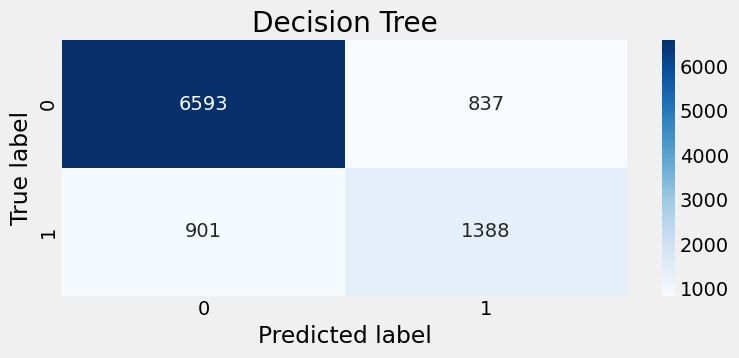

In [40]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_OHEncoder, y_train)

y_pred = decision_tree.predict(X_test_OHEncoder)
plot_confusion_matrix_sns(y_test, y_pred, "Decision Tree")


### Predictive modeling with oversampling of the minority class

In [41]:
# SMOTE on minority class
smt = SMOTE(random_state=7)

# Do the process
X_train_OHEncoder_up, y_train_up = smt.fit_resample(X_train_OHEncoder, y_train)

  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


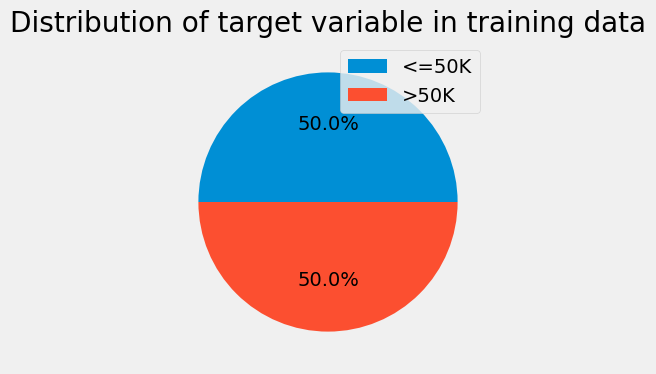

In [42]:
# Check the distribution of target variable in training data

# Concatene dans verif X_train_OHEncoder_up et y_train_up
verif = pd.concat([X_train_OHEncoder_up, y_train_up], axis=1)

plt.figure(figsize=(8, 4))
plt.pie(verif['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in training data')
plt.show()

Decision Tree

Matrice de confusion:
[[6391 1039]
 [ 841 1448]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7430
           1       0.58      0.63      0.61      2289

    accuracy                           0.81      9719
   macro avg       0.73      0.75      0.74      9719
weighted avg       0.81      0.81      0.81      9719
 

Exactitude: 80.656446 



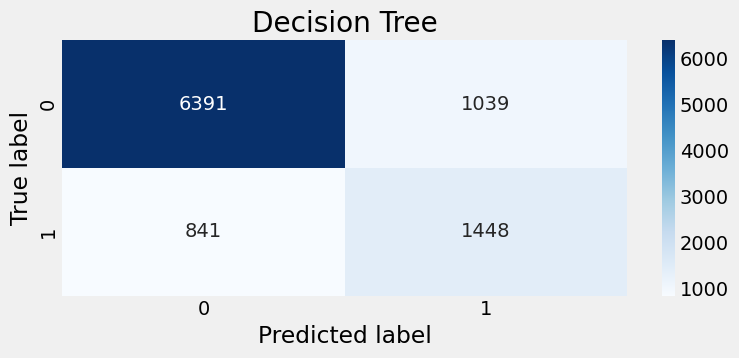

In [44]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_OHEncoder_up, y_train_up)

y_pred = decision_tree.predict(X_test_OHEncoder)
plot_confusion_matrix_sns(y_test, y_pred, "Decision Tree + SMOTE")

On n'observe pas de différence significative en sur-échantillonant la classe 1. On essaye alors d'optimiser les hyperparamètres.

### Hyper-parameters optimisation with GridSearch

In [45]:
X_train_OHEncoder_up.shape, y_train_up.shape, X_test_OHEncoder.shape, y_test.shape

((59438, 47), (59438,), (9719, 47), (9719,))

In [46]:
param_grid = {'C': [0.001, 0.01, 0.1, 1., 10.], 'max_iter': [100, 200, 300, 400]}
grid = GridSearchCV(decision_tree, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_OHEncoder_up, y_train_up)

ValueError: Invalid parameter 'C' for estimator DecisionTreeClassifier(random_state=42). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].